In [1]:
import torch
import torchaudio
import matplotlib.pyplot as plt

import librosa
import librosa.display
import numpy as np

/home/ndrw1221/miniconda3/envs/dlmag-hw0/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
file_paths = [
    "selected_wavs/bass_electronic_018-040-050.wav",
    "selected_wavs/bass_electronic_018-051-100.wav",
    "selected_wavs/bass_electronic_018-060-075.wav",
    "selected_wavs/guitar_acoustic_030-040-127.wav",
    "selected_wavs/guitar_acoustic_030-051-127.wav",
    "selected_wavs/guitar_acoustic_030-060-075.wav",
    "selected_wavs/organ_electronic_001-040-050.wav",
    "selected_wavs/organ_electronic_001-051-075.wav",
    "selected_wavs/organ_electronic_001-060-127.wav",
]

file_names = [
    "bass electronic 040",
    "bass electronic 051",
    "bass electronic 060",
    "guitar acoustic 040",
    "guitar acoustic 051",
    "guitar acoustic 060",
    "organ electronic 040",
    "organ electronic 051",
    "organ electronic 060",
]

## With torchaudio

/home/ndrw1221/miniconda3/envs/dlmag-hw0/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


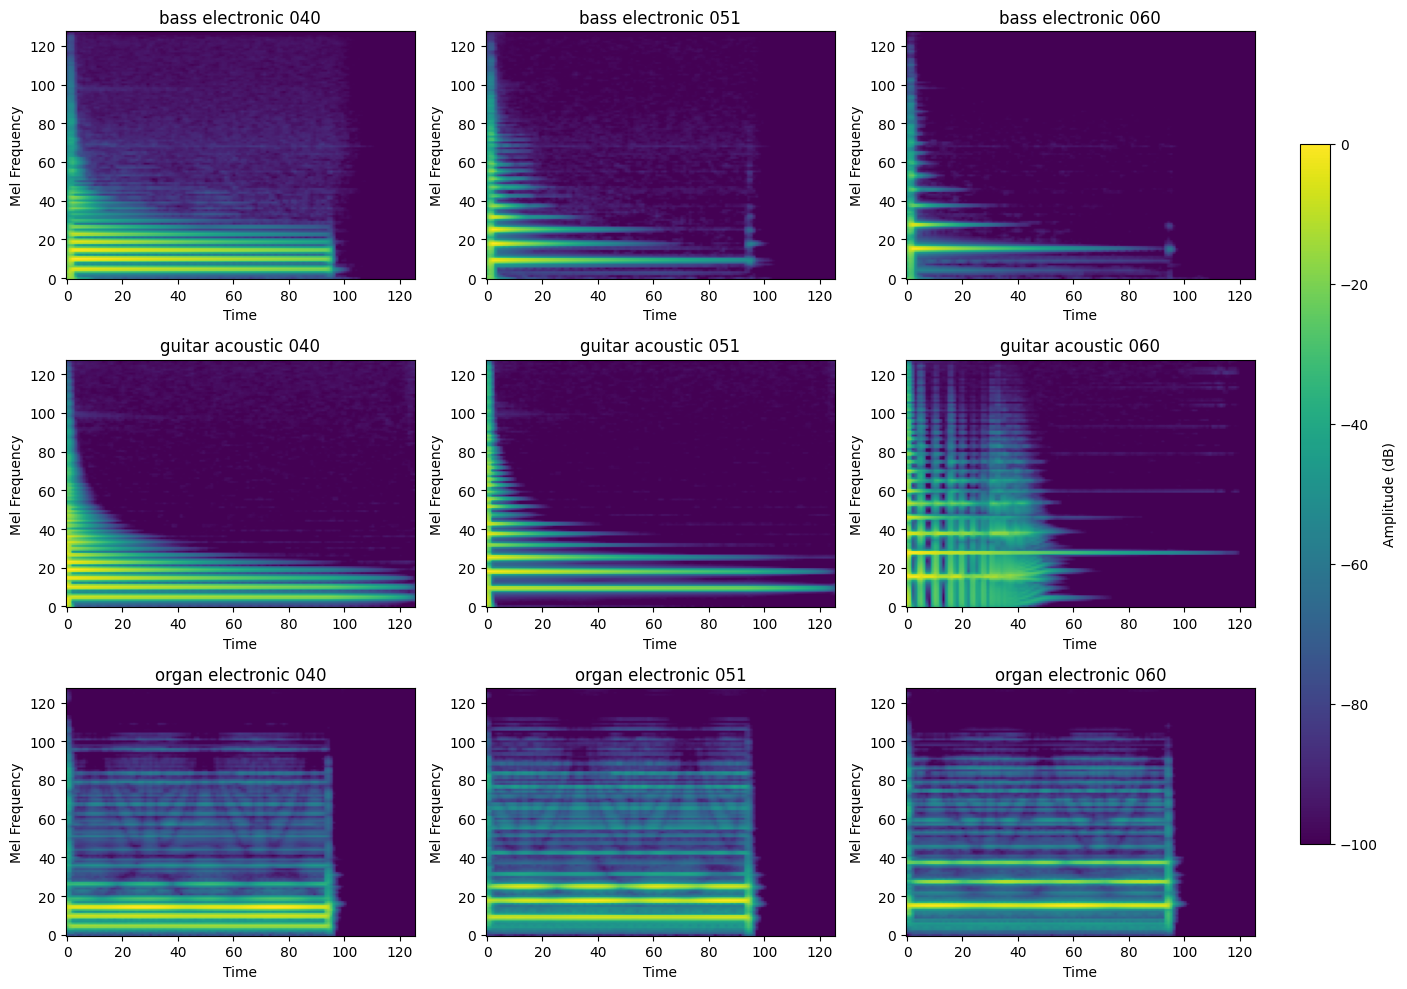

In [11]:
# Create a 3x3 subplot figure
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Loop through each file and its corresponding subplot
for i, wav_file in enumerate(file_paths):
    # Load the wav file
    waveform, sample_rate = torchaudio.load(wav_file)

    # Create the Mel Spectrogram
    mel_spectrogram = torchaudio.transforms.MelSpectrogram(
        sample_rate=sample_rate, n_fft=2048, hop_length=512
    )

    # Compute the Mel Spectrogram
    mel_spec_tensor = mel_spectrogram(waveform)

    # Normalize the Mel Spectrogram to the range [0, 1]
    def normalize(tensor):
        min_val = torch.min(tensor)
        max_val = torch.max(tensor)
        normalized_tensor = (tensor - min_val) / (max_val - min_val)
        return normalized_tensor

    # Apply normalization
    mel_spec_normalized = normalize(mel_spec_tensor)

    # Convert the Mel Spectrogram to decibels
    mel_spec_normalized_db = torchaudio.transforms.AmplitudeToDB()(mel_spec_normalized)

    # Clamp the decibel values to the range [0, -80] dB
    # mel_spec_normalized_db = torch.clamp(mel_spec_normalized_db, min=-80)

    # Select the corresponding axis (subplot)
    ax = axes[i // 3, i % 3]

    # Plot the Mel spectrogram in the subplot
    im = ax.imshow(
        mel_spec_normalized_db.squeeze().numpy(), origin="lower", aspect="auto"
    )

    ax.set_title(f"{file_names[i]}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Mel Frequency")

# Create a colorbar on the right side of the figure that applies to all subplots
fig.subplots_adjust(right=0.85)  # Adjust space on the right for the colorbar
cbar_ax = fig.add_axes(
    [0.87, 0.15, 0.02, 0.7]
)  # Adjust the values to correctly place the colorbar
fig.colorbar(im, cax=cbar_ax).set_label("Amplitude (dB)")  # Add the colorbar and label

# Adjust layout to make space between subplots
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect to avoid overlap
plt.show()

## With librosa

/home/ndrw1221/miniconda3/envs/dlmag-hw0/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


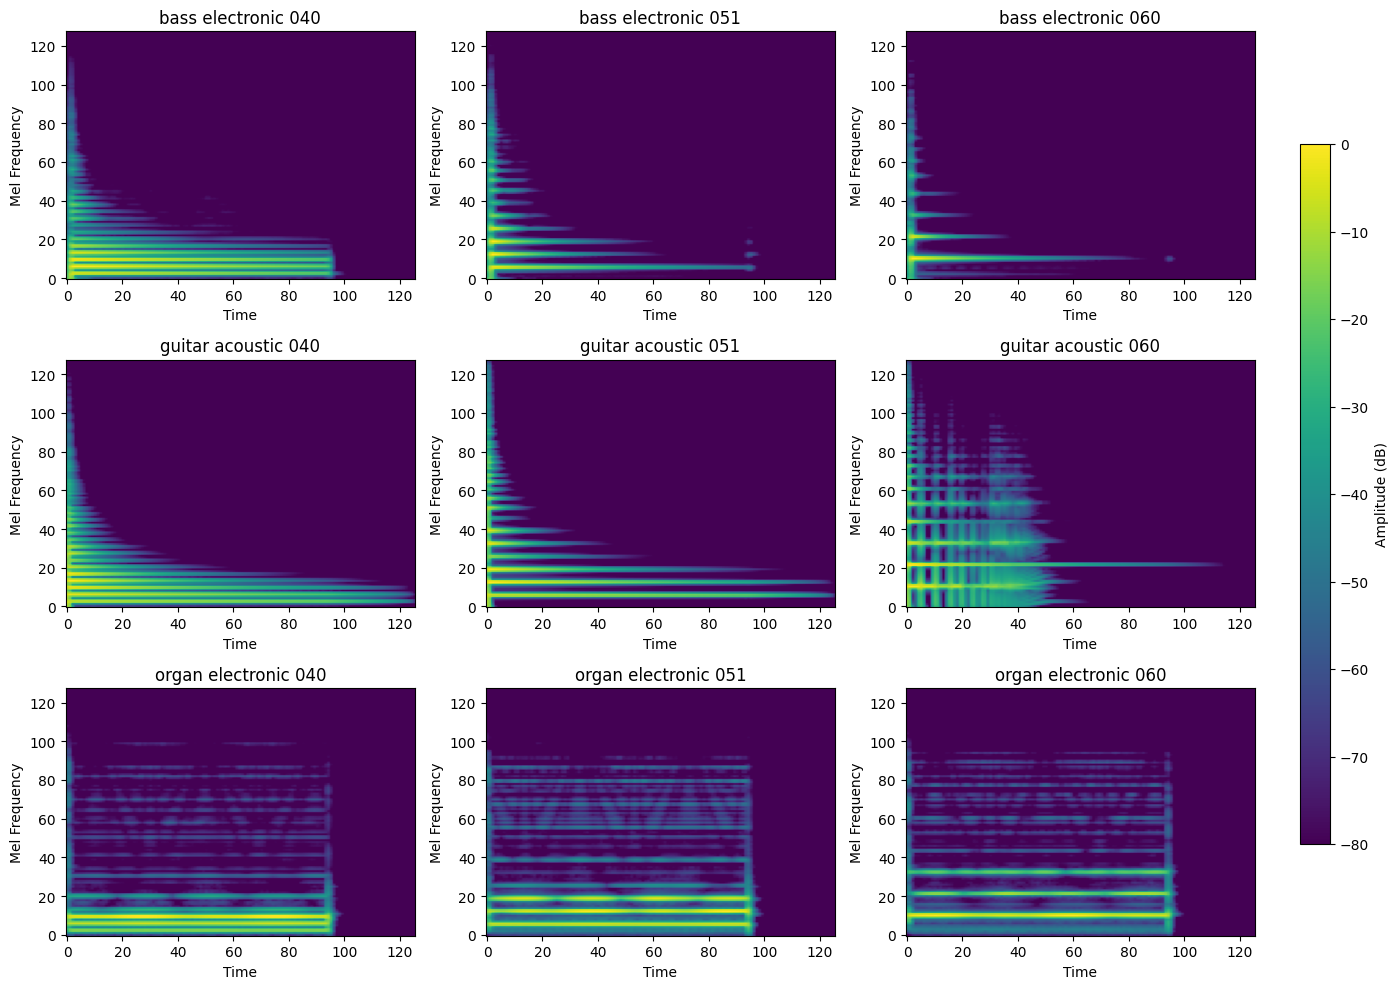

In [12]:
# Assuming file_paths and file_names are defined as before
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Loop through each file and its corresponding subplot
for i, wav_file in enumerate(file_paths):
    # Load the wav file using librosa
    waveform, sample_rate = librosa.load(wav_file, sr=None)

    # Create the Mel Spectrogram using librosa
    mel_spectrogram = librosa.feature.melspectrogram(
        y=waveform, sr=sample_rate, n_fft=2048, hop_length=512, power=2.0
    )

    # Convert the Mel Spectrogram to decibels
    mel_spec_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Select the corresponding axis (subplot)
    ax = axes[i // 3, i % 3]

    # Plot the Mel spectrogram in the subplot
    im = ax.imshow(mel_spec_db, origin="lower", aspect="auto")

    ax.set_title(f"{file_names[i]}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Mel Frequency")

# Create a colorbar on the right side of the figure that applies to all subplots
fig.subplots_adjust(right=0.85)  # Adjust space on the right for the colorbar
cbar_ax = fig.add_axes(
    [0.87, 0.15, 0.02, 0.7]
)  # Adjust the values to correctly place the colorbar
fig.colorbar(im, cax=cbar_ax).set_label("Amplitude (dB)")  # Add the colorbar and label

# Adjust layout to make space between subplots
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect to avoid overlap
plt.show()